In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [74]:
class MarkovChain:
    def __init__(self, transition_matrix, initial_probabilities, values=None):
        if len(transition_matrix.shape) != 2:
            raise Exception("Not matrix input")
        if transition_matrix.shape[0] != transition_matrix.shape[1]:
            raise Exception("Incorrect transition matrix size")
        if transition_matrix.shape[0] != initial_probabilities.shape[0]:
            raise Exception("Inconsistency of the sizes of transition matrix and initial probabilities vector")
        
        self._P = transition_matrix
        self._v0 = initial_probabilities
        self._x = np.arange(1, len(initial_probabilities) + 1) if values is None else values
        self._indeces = np.arange(len(initial_probabilities))


    def _simulate(self, t):
        index = np.random.choice(a=self._indeces, p=self._v0)
        simulation_values = np.array([self._x[index]])
        simulation_times = np.array([0])
        for step in range(1, t+1):
            p_list = self._P[index]
            index = np.random.choice(a=self._indeces, p=p_list)
            simulation_values = np.append(simulation_values, self._x[index])
            simulation_times = np.append(simulation_times, step)
        return simulation_values, simulation_times

    
    def simulation(self, t, num_simulations=None):
        """
        :param num_simulations: int or None - number of simulations. If None, it will be
        performed only one simulation.
        :return tuple(np.ndarray, np.array) - matrix of size num_simulations by t+1 (or np.array if num_simulations is None) 
        with values of random variable at all times and times array
        """
        if num_simulations is None:
            return self._simulate(t)
        simulations_values = np.empty((0, t + 1))
        simulations_times = np.arange(0, t + 1)
        for _ in range(num_simulations):
            sim_values = self._simulate(t)[0]
            simulations_values = np.append(simulations_values, sim_values.reshape(1, -1), axis=0)
        return simulations_values, simulations_times


    def simulation_values(self, t, num_simulations=None):
        """
        Same as MarkovChain.simulation but returns only values of random variable 
        at time moment t (final moment).
        """
        if num_simulations is None:
            return self._simulate(t)[0][-1]
        return self.simulation(t, num_simulations)[0][:, -1].ravel()


    def get_values(self):
        return np.copy(self._x)

In [75]:
def show_trajectory(simulation_results, title="Markov chain simulation"):
    values, times = simulation_results
    x_ticks = np.linspace(np.min(times), np.max(times), 5)
    y_ticks = np.arange(np.min(values)-2, np.max(values)+3)

    plt.scatter(times, values, s=50, c='m', label='Simulation values')
    plt.plot(times, values, "c")

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")

    plt.legend()
    plt.grid(True)
    plt.show()

In [76]:
test_TPM = np.array([[0.0, 0.0, 1.0, 0.0, 0.0], 
                     [1.0, 0.0, 0.0, 0.0, 0.0], 
                     [0.4, 0.6, 0.0, 0.0, 0.0], 
                     [0.1, 0.4, 0.2, 0.3, 0.0],
                     [0.0, 0.0, 0.0, 0.5, 0.5]])
test_init_p1 = np.array([1/3, 1/3, 0.0, 0.0, 1/3])
test_init_p2 = np.array([0.0, 0.0, 0.5, 0.5, 0.0])

t_list = [5, 10, 20]
N = 100

mc1 = MarkovChain(test_TPM, test_init_p1)
mc2 = MarkovChain(test_TPM, test_init_p2)

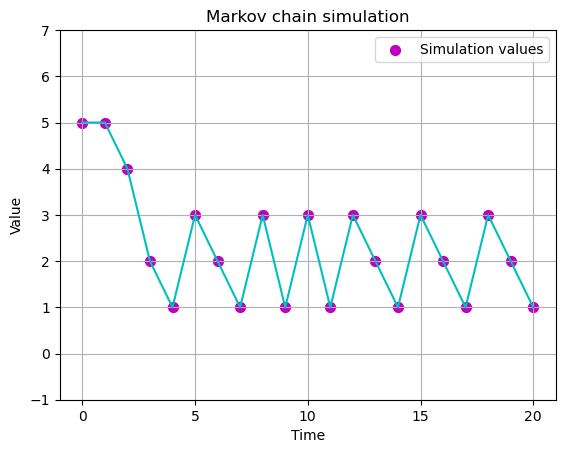

In [80]:
assert mc1.simulation(t=8)[0].shape[0] == 9
assert mc1.simulation(t=10)[0].shape[0] == 11

assert mc1.simulation(t=5, num_simulations=10)[0].shape[0] == 10
assert mc1.simulation(t=5, num_simulations=10)[0].shape[1] == 6
assert mc2.simulation(t=10, num_simulations=20)[0].shape[1] == mc2.simulation(t=10, num_simulations=20)[1].shape[0]

assert mc1.simulation_values(t=4, num_simulations=20).shape[0] == 20
assert mc2.simulation_values(t=1, num_simulations=35).shape[0] == 35

show_trajectory(mc1.simulation(t=20))